In [33]:
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

### 1. importing required libraries and loading the iris plants dataset (classification)
- libraries: datasets, model_selection, metrics, ensemble

In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 2. dividing the datasets into two parts i.e. training datasets and test datasets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 3. creating an adaboost classifier 

In [36]:
adaboost_classifier = AdaBoostClassifier(n_estimators=50)

### 4. training the model on the training dataset 

In [37]:
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

### 5. performing predictions on the test dataset and measuring the performance
- metrics are used to find accuracy or error

In [38]:
y_pred = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


### 6. Given 2D dataset, split them and train adaboost on the training dataset
- X, y are given

In [39]:
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, 1 -y2))

In [40]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50)

# train
adaboost_classifier.fit(X_train, y_train)

# evaluation
y_pred = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.86


### 7. visualizing 4 individual classifier from the trained adaboost
- from sklearn.inspection import DecisionBoundaryDisplay

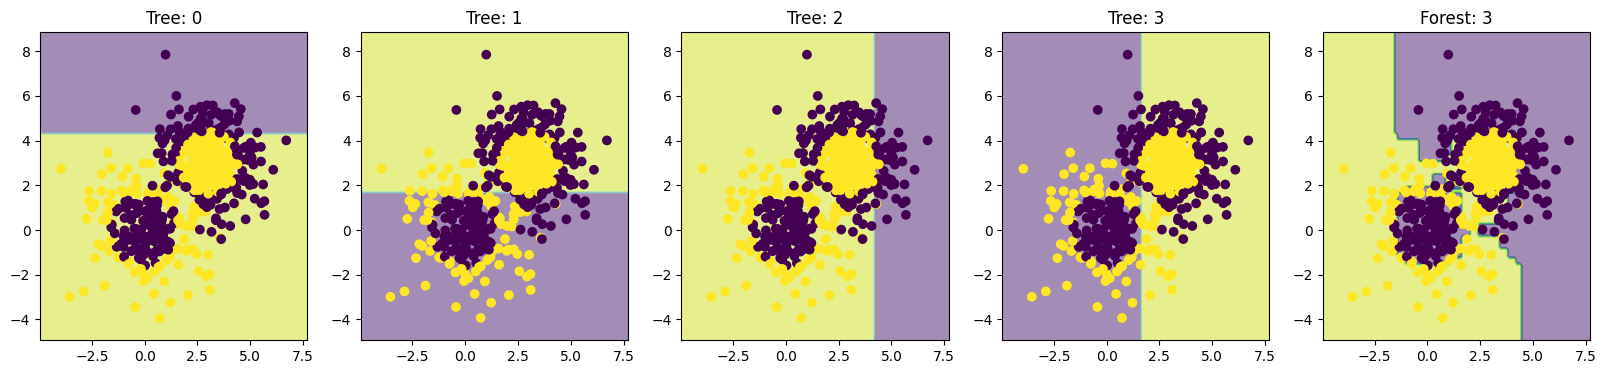

In [41]:
from sklearn.inspection import DecisionBoundaryDisplay

model = adaboost_classifier

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (20,4))
for index in range(0, 4):
    DecisionBoundaryDisplay.from_estimator(
            model.estimators_[index], X, alpha=0.5, response_method="predict", ax=axes[index]
        )
    axes[index].scatter(X[:,0],X[:,1],c=y)
    axes[index].set_title('Tree: ' + str(index))

DecisionBoundaryDisplay.from_estimator(
        model, X, alpha=0.5, response_method="predict", ax=axes[-1]
    )
axes[-1].scatter(X[:,0],X[:,1],c=y)
axes[-1].set_title('Forest: ' + str(index))    

plt.show()

In [42]:
# fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (20,4))
# for index in range(0, 4):
#     DecisionBoundaryDisplay.from_estimator(
#             model.estimators_[index], X, alpha=0.5, response_method="predict", ax=axes[index]
#         )
#     axes[index].scatter(X[:,0],X[:,1],c=y)
#     axes[index].set_title('Tree: ' + str(index))

# DecisionBoundaryDisplay.from_estimator(
#         model, X, alpha=0.5, response_method="predict", ax=axes[-1]
#     )
# axes[-1].scatter(X[:,0],X[:,1],c=y)
# axes[-1].set_title('Forest: ' + str(index))    
# plt.show()

### 8. Change a base estimator, train it on the above training dataset, visualize 4 individual classifiers
- Recommendation: sklearn.svm.NuSVC
- AdaBoostClassifier has a hyperparameter named 'estimator'
- In many case, if your estimator will not return prediction probabilities, then, the hyperparameter 'algorithm' must be changed to "SAMME"

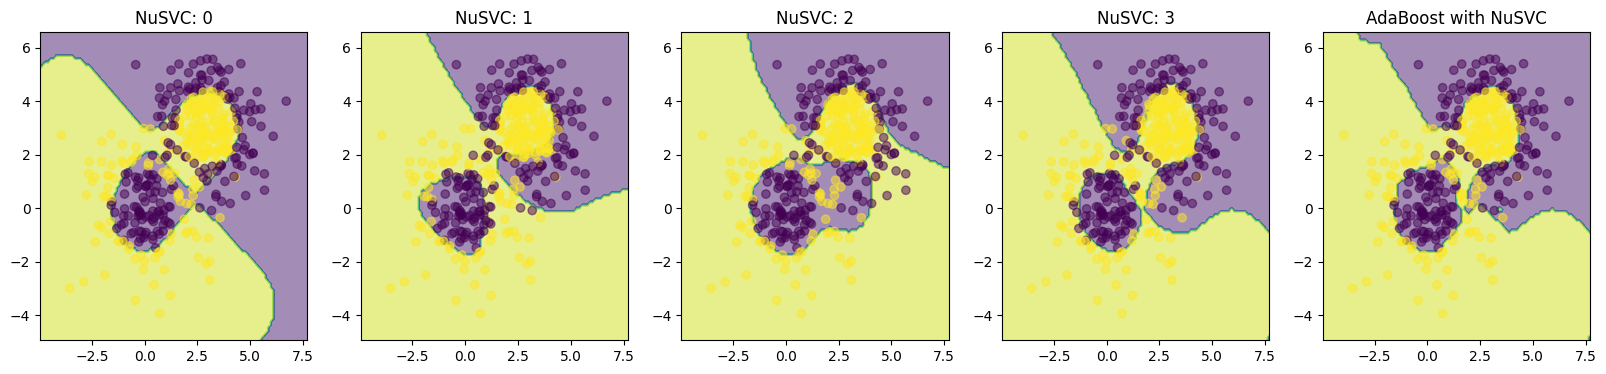

In [43]:
from sklearn.svm import NuSVC

# Create and train with NuSVC
nusvc_base_estimator = NuSVC(probability=True)
adaboost_classifier_nusvc = AdaBoostClassifier(estimator=nusvc_base_estimator, n_estimators=50, algorithm='SAMME') # change algorithm
adaboost_classifier_nusvc.fit(X_train, y_train)

# Visualize 4 individual classifiers
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for index in range(0, min(4, len(adaboost_classifier_nusvc.estimators_))):
    DecisionBoundaryDisplay.from_estimator(
        adaboost_classifier_nusvc.estimators_[index], X_train, alpha=0.5, response_method="predict", ax=axes[index]
    )
    axes[index].scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5)
    axes[index].set_title('NuSVC: ' + str(index))

DecisionBoundaryDisplay.from_estimator(
    adaboost_classifier_nusvc, X_train, alpha=0.5, response_method="predict", ax=axes[-1]
)
axes[-1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5)
axes[-1].set_title('AdaBoost with NuSVC')

plt.show()

### 9. 
1. load wine dataset from scikit learn, 
2. train both single base estimator and adaboost
3. compare their accuracy

In [44]:
from sklearn.tree import DecisionTreeClassifier

wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

single_base_estimator = DecisionTreeClassifier()
single_base_estimator.fit(X_train, y_train)

y_single_pred = single_base_estimator.predict(X_test)

# single base estimator
accuracy_single = accuracy_score(y_test, y_single_pred)
print(f'Accuracy of Single Base Estimator: {accuracy_single}')

# AdaBoost classifier (DecisionTree를 분류기로 사용)
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
adaboost_classifier.fit(X_train, y_train)

y_adaboost_pred = adaboost_classifier.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_adaboost_pred)
print(f'Accuracy of AdaBoost Classifier: {accuracy_adaboost}')

Accuracy of Single Base Estimator: 0.9166666666666666
Accuracy of AdaBoost Classifier: 0.9166666666666666


### 10. 
1. load Olivetti faces dataset from scikit learn
    - sklearn.datasets.fetch_olivetti_faces
2. train both single base estimator and adaboost
3. compare their accuracy

In [49]:
from sklearn.svm import SVC

faces_data = datasets.fetch_olivetti_faces(shuffle=True)
X = faces_data.data
y = faces_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# single SVM classifier
single_svm_classifier = SVC(kernel='linear', C=1)
single_svm_classifier.fit(X_train, y_train)

y_single_svm_pred = single_svm_classifier.predict(X_test)

accuracy_single_svm = accuracy_score(y_test, y_single_svm_pred)
print(f'Accuracy of Single SVM Classifier: {accuracy_single_svm}')

# SVM을 분류기로 하는 AdaBoost
svm_base_estimator = SVC(kernel='linear', C=10, probability=True)
adaboost_classifier_svm = AdaBoostClassifier(estimator=svm_base_estimator, n_estimators=50)
adaboost_classifier_svm.fit(X_train, y_train)

y_adaboost_svm_pred = adaboost_classifier_svm.predict(X_test)

accuracy_adaboost_svm = accuracy_score(y_test, y_adaboost_svm_pred)
print(f'Accuracy of AdaBoost Classifier with SVM: {accuracy_adaboost_svm}')

Accuracy of Single SVM Classifier: 0.95
Accuracy of AdaBoost Classifier with SVM: 0.9375


### 11. 
1. load Olivetti faces dataset from scikit learn
    - sklearn.datasets.fetch_olivetti_faces
2. train two adaboosts with different base estimators
3. compare their accuracy

In [59]:
faces_data = datasets.fetch_olivetti_faces(shuffle=True)
X = faces_data.data
y = faces_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 첫 번째 AdaBoost 분류기: Decision Tree를 기본 분류기로 사용
adaboost_classifier_tree = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20), n_estimators=50)
adaboost_classifier_tree.fit(X_train, y_train)

# 두 번째 AdaBoost 분류기: SVM을 기본 분류기로 사용
adaboost_classifier_svm = AdaBoostClassifier(estimator=SVC(probability=True, kernel='linear', C=10), n_estimators=50)
adaboost_classifier_svm.fit(X_train, y_train)

y_pred_tree = adaboost_classifier_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

y_pred_svm = adaboost_classifier_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy of AdaBoost Classifier with Decision Tree): {accuracy_tree}')
print(f'Accuracy of AdaBoost Classifier with SVM): {accuracy_svm}')

Accuracy of AdaBoost Classifier with Decision Tree): 0.7875
Accuracy of AdaBoost Classifier with SVM): 0.8875


----

In [47]:
print("20172206,손범준")

20172206,손범준
